In [1]:
import sys
sys.path.append("../util/")

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def least_mean_square(dataset, eta=0.01, tau=1000):
    weights = np.zeros(dataset.shape[1]-1)
    bias = 0.0
    counter = 0
    for example in dataset:
        eta /= (1+counter/tau)
        counter += 1
        epsilon = example[2]-np.inner(example[:2], weights)-bias
        weights += eta*epsilon*example[:2]
        bias += eta*epsilon
        error_rate = np.sum(np.sign(np.dot(dataset[:, :2], weights))!=dataset[:, 2]) / dataset.shape[0]
        plt.scatter(counter, error_rate, c='g')
    print(error_rate)
    return weights, bias

In [3]:
def test_least_mean_square():
    dataset = double_moon(1000, d=1)
    w, b = least_mean_square(dataset)
    print(w, b)
    fig = plt.figure()
    ax = fig.subplots(1, 1)
    visualize_data(dataset, ax)
    t = np.linspace(-10, 10, num=2)
    if not (w[1] == 0):
        ax.plot(t, -(w[0]*t+b)/w[1])
    ax.set_aspect('equal')
    plt.show()

0.002
[-0.00440081  0.15461469] 0.06737630771868051


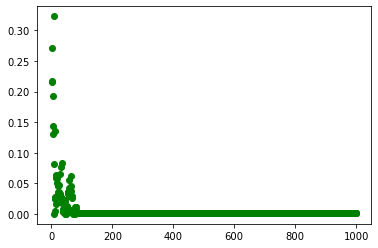

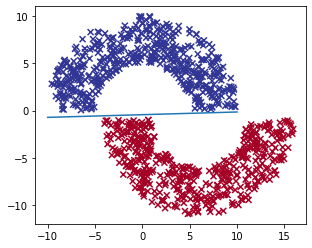

In [4]:
if (__name__ == "__main__"):
    from ipynb.fs.full.data_generator_2d import double_moon, gaussian_2d, visualize_data
    test_least_mean_square()